## Multi-platform, multi-modal bayesian optimized coupled auto-encoder analysis 

In this notebook, we will present the analysis of ~50k cells coming from IVSCC, ME, EM and fMOST piplines. 


In [1]:
# From python
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# From cplAE_MET
from cplAE_MET.utils.plots import plot_z_3d, plot_m
from cplAE_MET.utils.optuna_helpers import load_study
from cplAE_MET.utils.analysis_helpers import load_exp_output
from cplAE_MET.utils.analysis_helpers import summary_classification_results
from cplAE_MET.utils.analysis_helpers import summarize_data_output_pkl
from cplAE_MET.utils.utils import  get_all_1d_mask


# From optuna
from optuna.visualization import plot_parallel_coordinate

dat = "/home/fahimehb/Remote-AI-root/allen/programs/celltypes/workgroups/mousecelltypes/MachineLearning/Patchseq-Exc/dat/"
locked_data = pd.read_csv(dat + "exc_inh_ME_fMOST_EM_specimen_ids_shuffled_4Apr23.txt").drop(columns=["Unnamed: 0"])

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}


In [2]:
### Platform summary for 10k cells
summary1, summary2 = summarize_data_output_pkl(exp_name="Tonly_Eonly_Monly_10k", pkl_output_file="exit_summary_fold_0_test.pkl")
print(tabulate(summary1, headers='keys', tablefmt='psql'))
print(tabulate(summary2, headers='keys', tablefmt='psql'))

+----+------------+-----+------+-----+-------+-------+-------+---------+---------+
|    | platform   |   T |    E |   M |   E&T |   M&T |   M&E |   M&E&T |   total |
|----+------------+-----+------+-----+-------+-------+-------+---------+---------|
|  0 | patchseq   | 611 |    0 |   5 |  4384 |   139 |    57 |    1394 |    6590 |
|  1 | ME         |   0 | 1462 |  11 |     0 |     0 |   436 |       0 |    1909 |
|  2 | EM         |   0 |    0 | 479 |     0 |     0 |     0 |       0 |     479 |
|  3 | fMOST      |   0 |    0 | 280 |     0 |     0 |     0 |       0 |     280 |
|  4 | all        | 611 | 1462 | 775 |  4384 |   139 |   493 |    1394 |    9258 |
+----+------------+-----+------+-----+-------+-------+-------+---------+---------+
+----+---------+-----+------+-----+-------+-------+-------+---------+---------+
|    | class   |   T |    E |   M |   E&T |   M&T |   M&E |   M&E&T |   total |
|----+---------+-----+------+-----+-------+-------+-------+---------+---------|
|  0 | exc   

10k model running uncoupled autoencoder:

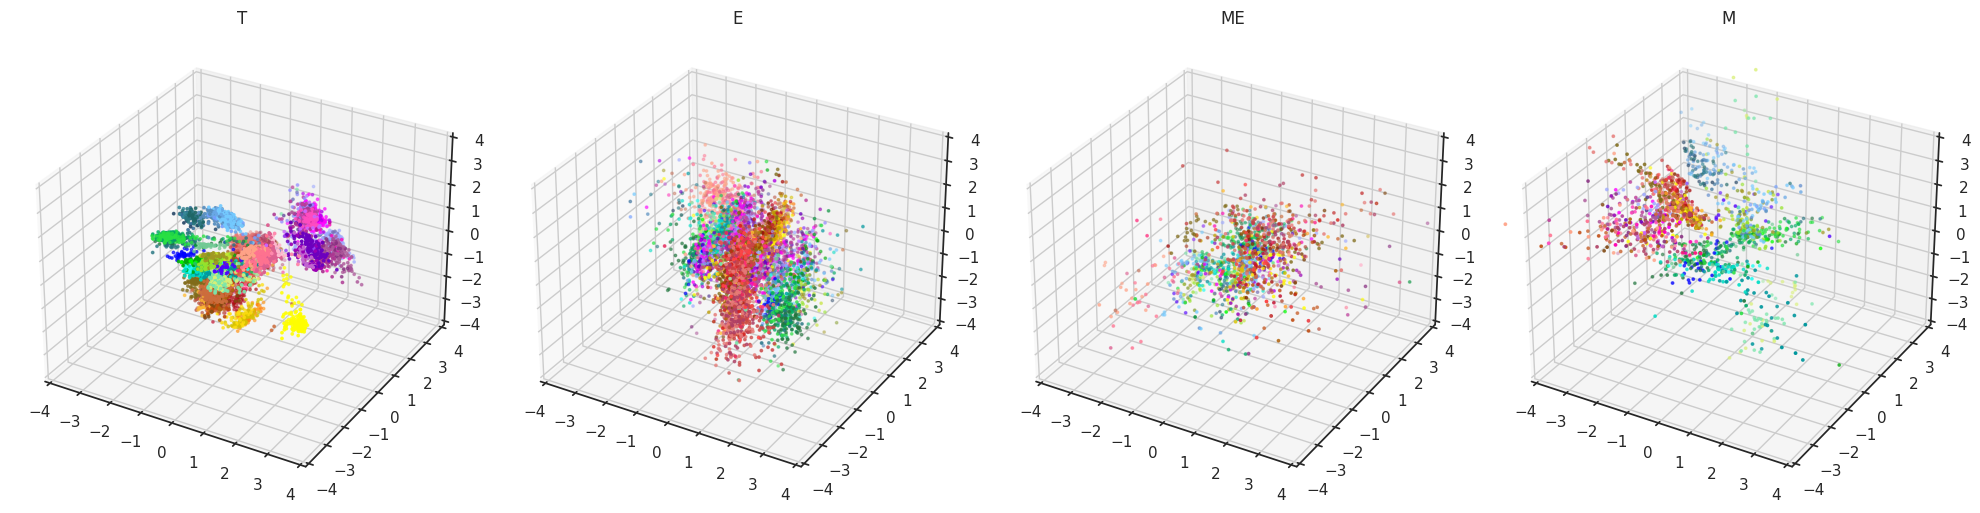

######################################## EM cells are shown in gray #################################################


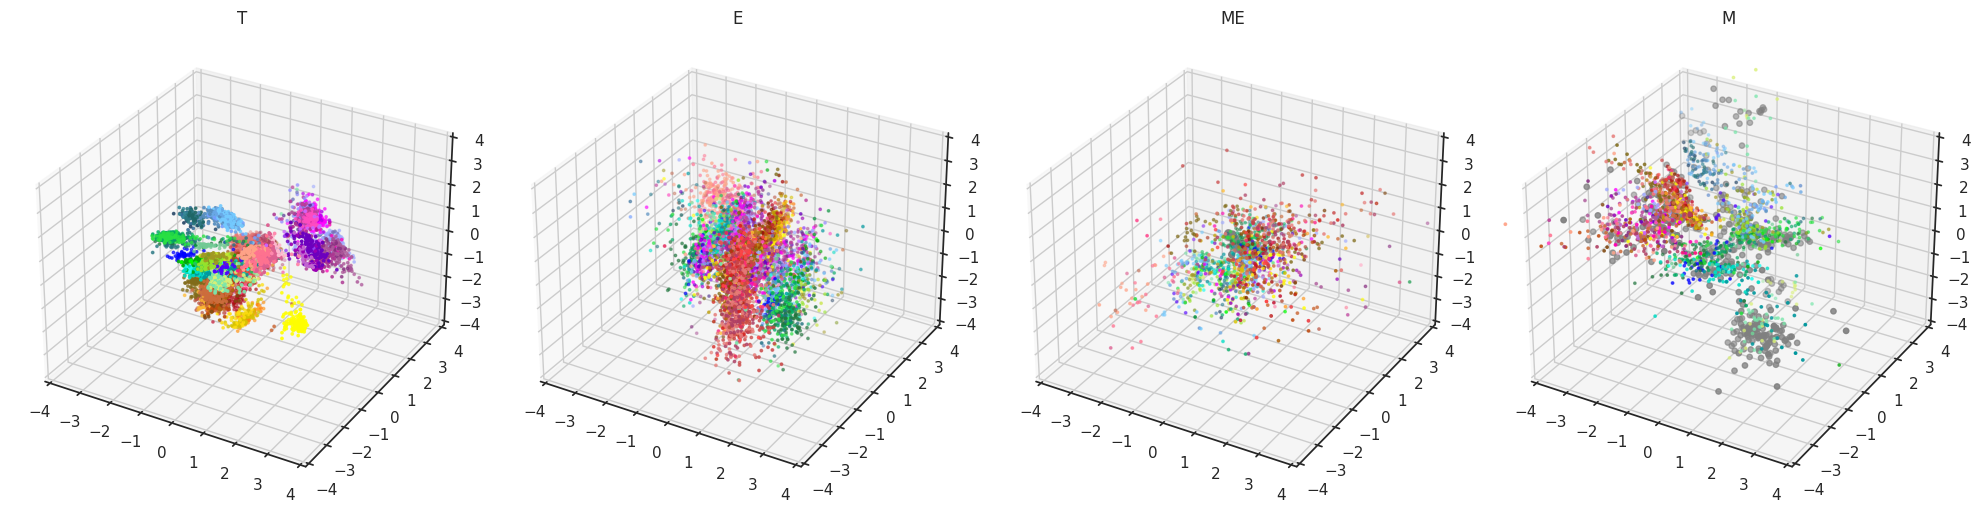

######################################## fmost cells are shown in gray #################################################


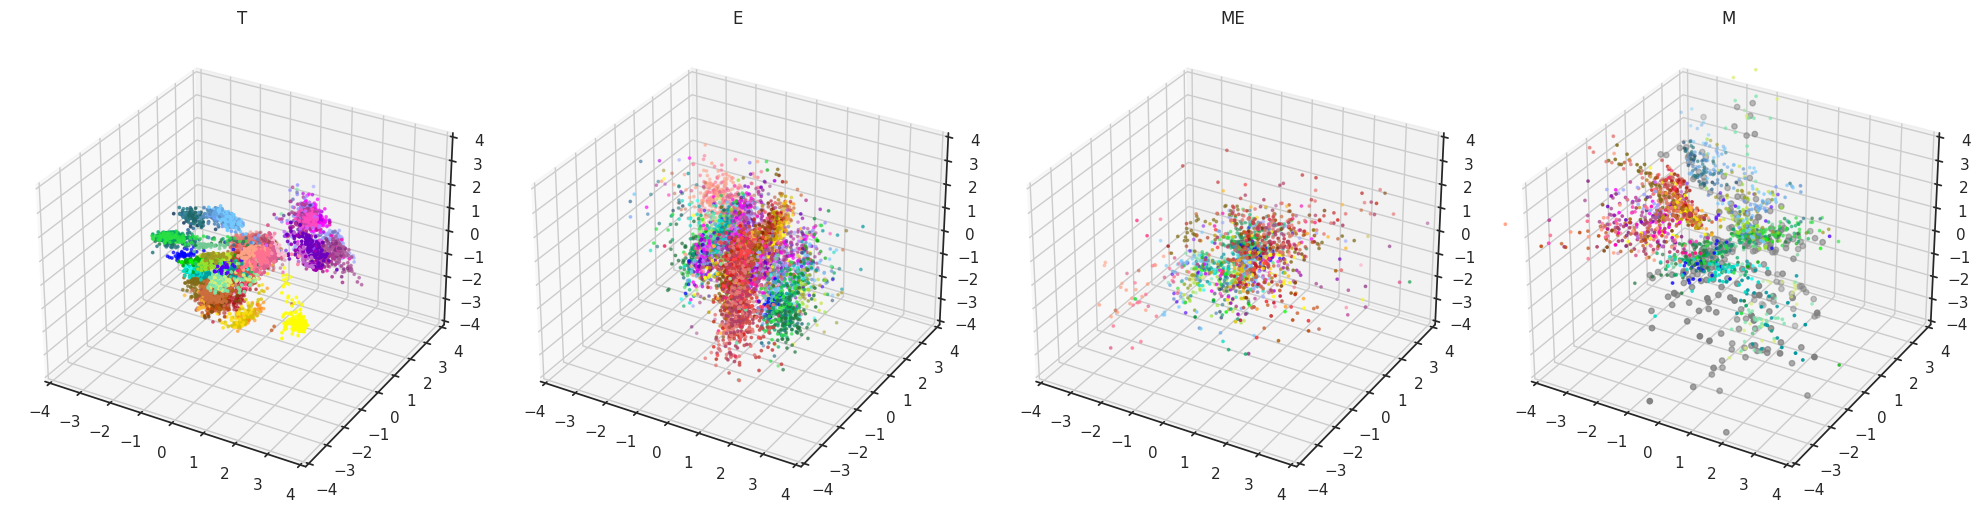

In [20]:
lim = (-4,4)
uncoupled_output = load_exp_output(exp_name="Tonly_Eonly_Monly_10k", pkl_file="exit_summary_fold_0_test.pkl")
plot_z_3d(uncoupled_output, xlim=lim, ylim=lim, zlim=lim)
fmost_mask = [True if i.rstrip()=="fMOST" else False for i in uncoupled_output['platform']]
ME_mask = [True if i.rstrip()=="ME" else False for i in uncoupled_output['platform']]
EM_mask = [True if i.rstrip()=="EM" else False for i in uncoupled_output['platform']]
print("######################################## EM cells are shown in gray #################################################")
plot_z_3d(uncoupled_output, cell_mask=EM_mask, xlim=lim, ylim=lim, zlim=lim)
print("######################################## fmost cells are shown in gray #################################################")
plot_z_3d(uncoupled_output, cell_mask=fmost_mask, xlim=lim, ylim=lim, zlim=lim)

In [3]:
# Number of trials and the best trial number for the 10k cells
study10k = load_study(exp_name="MET_10k_sratified_50met")
best10k_trial = study10k.best_trial.number
print("Best model for the 10k cells", best10k_trial)
print("Number of trials so far:", len(study10k.trials))

[I 2023-04-26 12:31:44,139] Using an existing study with name 'MET_10k_sratified_50met' instead of creating a new one.


sqlite:////home/fahimehb/Local/new_codes/cplAE_MET/data/results/MET_10k_sratified_50met/MET_10k_sratified_50met.db
Best model for the 10k cells 144
Number of trials so far: 401


In [4]:
for k, v in study10k.best_params.items():
    print(k, np.exp(v))

alpha_E 0.5746341588745761
alpha_M 0.9451380391362904
alpha_ME 0.5265533874240905
lambda_tune_E_M 0.3760275112413295
lambda_tune_E_ME 0.030949438316048593
lambda_tune_E_T 0.009545521192151863
lambda_tune_ME_E 1.982964187407613
lambda_tune_ME_M 2.90760806214
lambda_tune_ME_T 0.2983573789190333
lambda_tune_M_E 0.011531935886904498
lambda_tune_M_ME 0.012008208599827912
lambda_tune_M_T 0.059125003307076714
lambda_tune_T_E 6.192438725488329
lambda_tune_T_M 1.9271636232758274
lambda_tune_T_ME 3.5737706512607312


In [5]:
plot_parallel_coordinate(study10k)

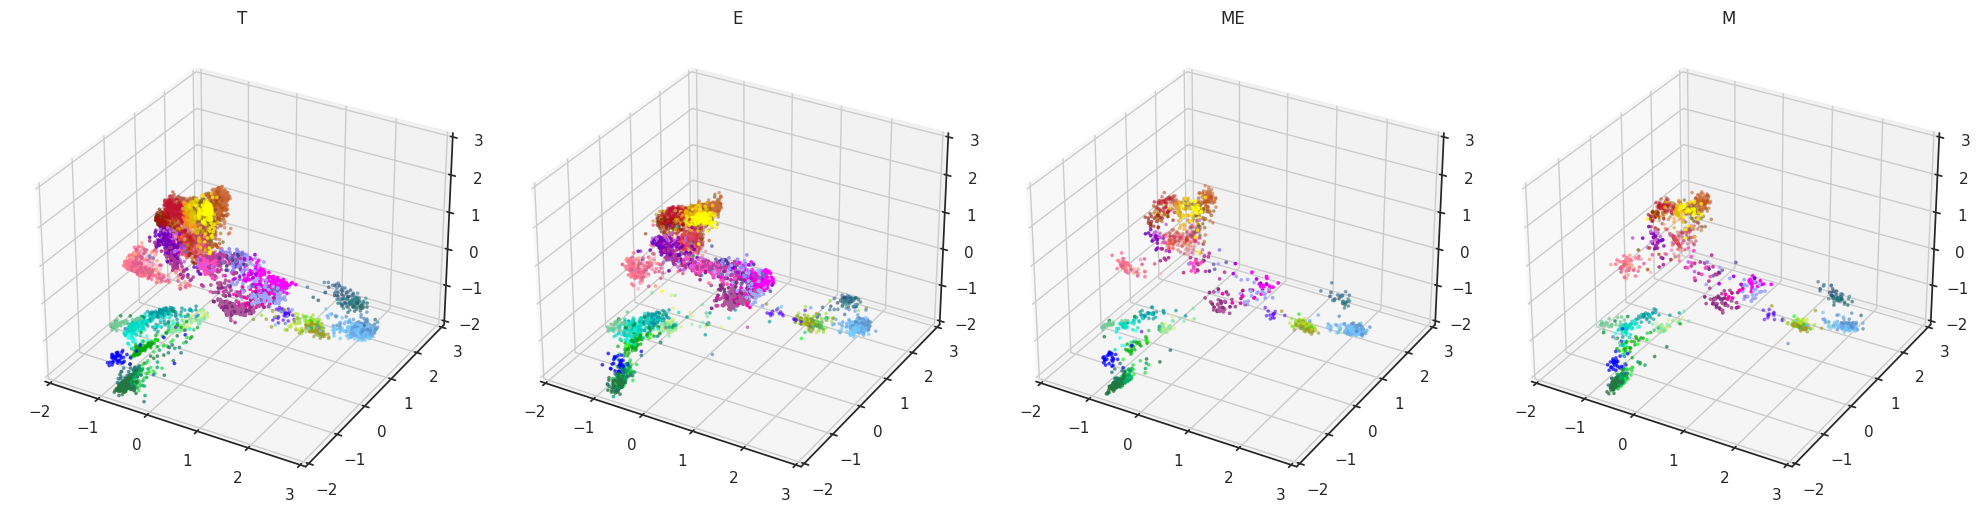

10fold cross_validated Classification acc at different levels:
+----+--------------+---------------+----------------+-----------------+----------------+
|    |   t_clusters |   t_class_acc |   et_class_acc |   met_class_acc |   mt_class_acc |
|----+--------------+---------------+----------------+-----------------+----------------|
|  0 |           93 |         59.13 |          44.6  |           58.58 |           52.5 |
|  0 |           59 |         76.01 |          62.98 |           78.52 |           73   |
|  0 |           50 |         79.72 |          66.48 |           83.59 |           78.8 |
+----+--------------+---------------+----------------+-----------------+----------------+
######################################## EM cells are shown in gray #################################################


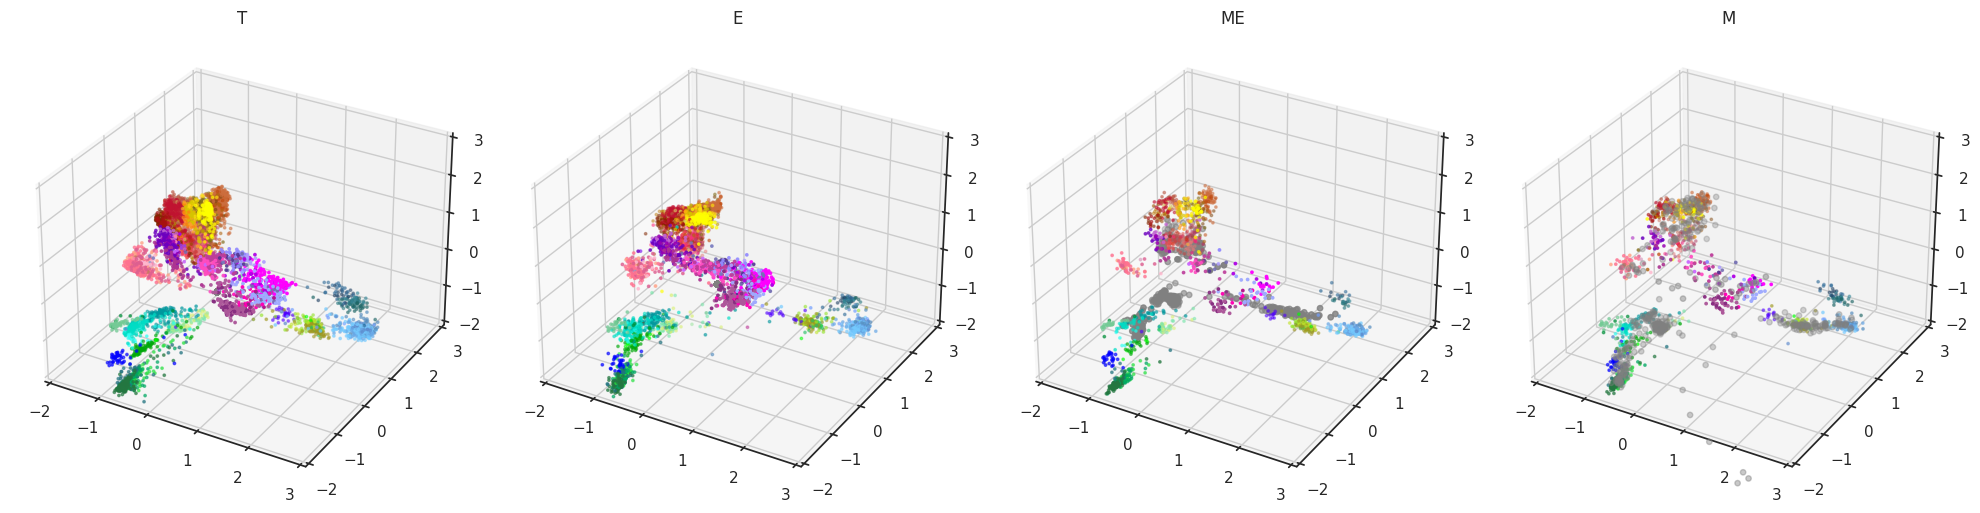

######################################## fmost cells are shown in gray #################################################


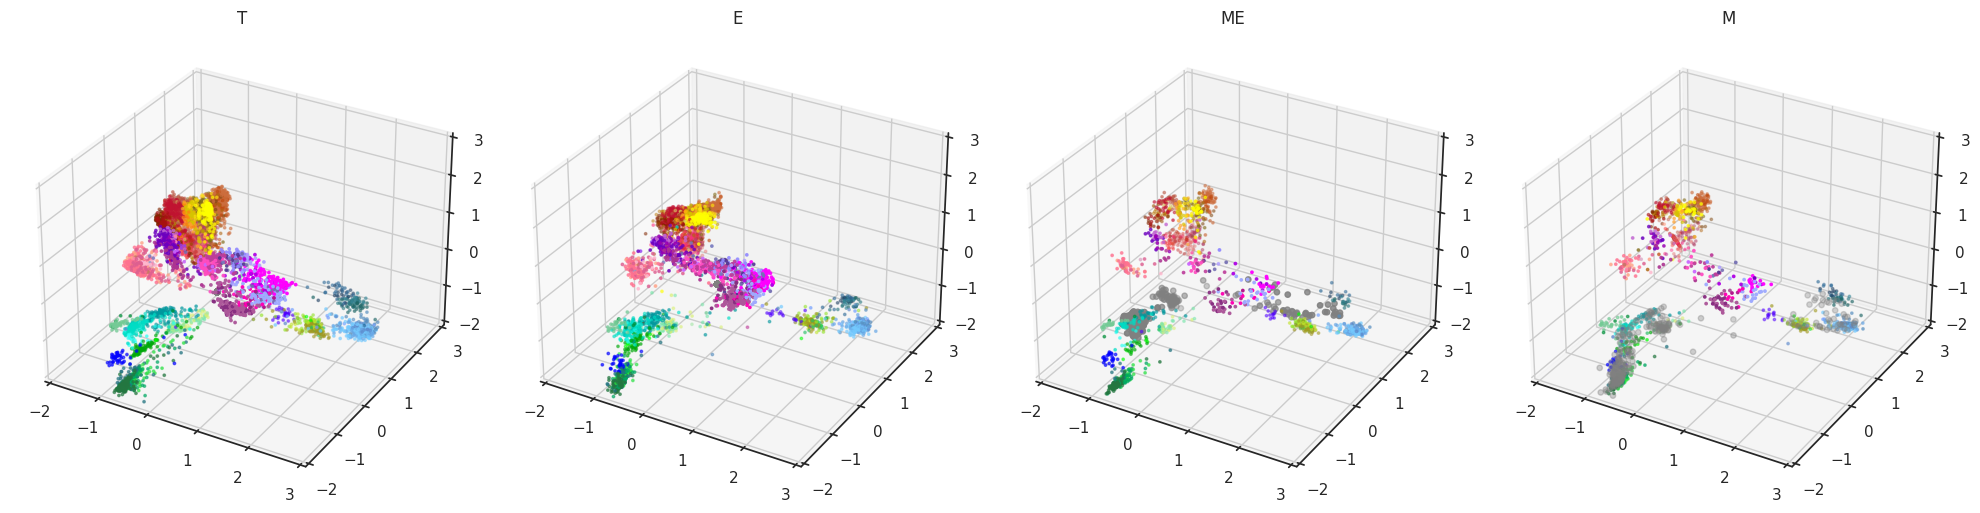

In [6]:
lim = (-2,3)
cpl_10k_output = load_exp_output(exp_name="MET_10k_sratified_50met", pkl_file="Results_trial_144.pkl")
fmost_mask = [True if i.rstrip()=="fMOST" else False for i in cpl_10k_output['platform']]
EM_mask = [True if i.rstrip()=="EM" else False for i in cpl_10k_output['platform']]
em_cells = cpl_10k_output['specimen_id'][EM_mask]
fmost_cells = cpl_10k_output['specimen_id'][fmost_mask]


plot_z_3d(cpl_10k_output, xlim=lim, ylim=lim, zlim=lim)
print("10fold cross_validated Classification acc at different levels:")
print(tabulate(summary_classification_results(cpl_10k_output), headers = 'keys', tablefmt = 'psql'))
print("######################################## EM cells are shown in gray #################################################")
plot_z_3d(cpl_10k_output, cell_mask=EM_mask, xlim=lim, ylim=lim, zlim=lim)
print("######################################## fmost cells are shown in gray #################################################")
plot_z_3d(cpl_10k_output, cell_mask=fmost_mask, xlim=lim, ylim=lim, zlim=lim)

In [4]:
summary_classification_results(cpl_10k_output, reporting_on="kfold")

t_clusters t_class_acc et_class_acc met_class_acc mt_class_acc
0         93       59.13        44.60         58.58        52.50
0         59       76.01        62.98         78.52        73.00
0         50       79.72        66.48         83.59        78.80

In [5]:
summary_classification_results(cpl_10k_output, reporting_on="test_cells", train_inds=cpl_10k_output['train_ind'], test_inds=cpl_10k_output['val_ind'])

t_clusters t_class_acc et_class_acc met_class_acc mt_class_acc
0         94       59.84        39.34         52.46        32.79
0         60       83.61        63.93         74.59        57.38
0         51       88.52        67.21         80.33        62.30

In [59]:

fmost_mask = np.array([True if i.rstrip()=="fMOST" else False for i in cpl_10k_output['platform']])
EM_mask = np.array([True if i.rstrip()=="EM" else False for i in cpl_10k_output['platform']])
patchseq_mask = np.array([True if i.rstrip()=="patchseq" else False for i in cpl_10k_output['platform']])
patchseq_m_mask = np.logical_and(patchseq_mask, cpl_10k_output['is_m_1d'])

========================================  Original Image of a fmost cell ========================================


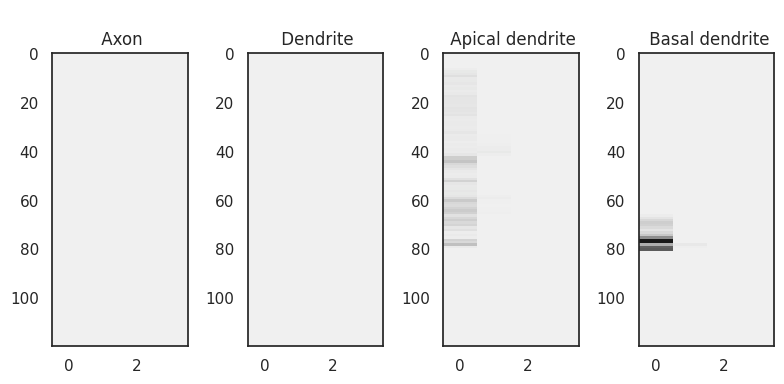

=============================  reconstructed image from reconstructed nmf comps =============================


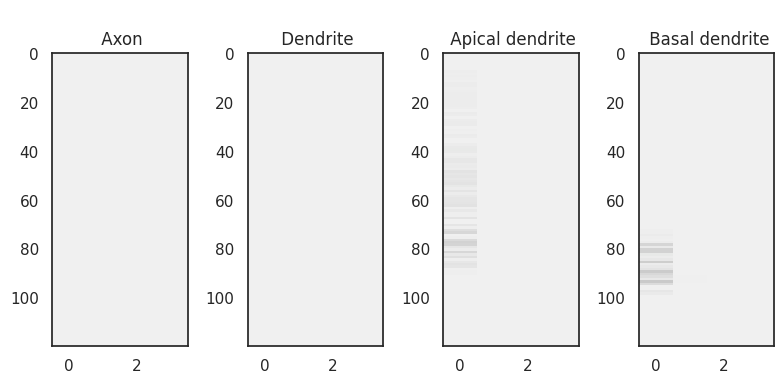

In [63]:
cell= 1500
print("========================================  Original Image of a fmost cell ========================================")
plot_m(cpl_10k_output['hist_ax_de_api_bas'][patchseq_m_mask][cell,...])
print("=============================  reconstructed image from reconstructed nmf comps =============================")
plot_m(cpl_10k_output['rec_arbor_density'][patchseq_m_mask][cell,...])

In [60]:
masks = get_all_1d_mask(cpl_10k_output)

In [50]:
cpl_10k_output.keys()

dict_keys(['XT', 'XM', 'XE', 'XrT', 'XrE', 'XrM', 'XrM_me_paired', 'XrE_me_paired', 'rec_arbor_density', 'zm', 'ze', 'zt', 'zme_paired', 'is_t_1d', 'is_e_1d', 'is_m_1d', 'cluster_id', 'gene_ids', 'e_features', 'specimen_id', 'cluster_label', 'merged_cluster_label_at40', 'merged_cluster_label_at50', 'merged_cluster_label_at60', 'cluster_color', 'platform', 'class', 'class_id', 'group', 'subgroup', 'hist_ax_de_api_bas', 'M_nmf_total_vars_ax', 'M_nmf_total_vars_de', 'M_nmf_total_vars_api', 'M_nmf_total_vars_bas', 'M_nmf_components_ax', 'M_nmf_components_de', 'M_nmf_components_api', 'M_nmf_components_bas', 'train_ind', 'val_ind'])

In [52]:
rec_nmfs = load_exp_output(exp_name="MET_10k_sratified_50met", pkl_file="cross_modal_nmfs_rec.pkl")

In [56]:
rec_arbor_densities = {}
for k, v in rec_nmfs.items():
    min_lim = 0
    rec_channel = {}
    for channel in ['ax', 'de', 'api', 'bas']:
        comp_name = "M_nmf_components_" + channel
        total_var_name = "M_nmf_total_vars_" + channel
        col_limit = (min_lim , min_lim + cpl_10k_output[comp_name].shape[0])
        rec_channel[channel] = (np.dot(rec_nmfs[k][:, col_limit[0]:col_limit[1]] * cpl_10k_output[total_var_name], cpl_10k_output[comp_name])).reshape(-1, 120, 4)
        min_lim = col_limit[1]
    
    rec_arbor_densities[k] = np.stack((rec_channel['ax'], rec_channel['de'], rec_channel['api'], rec_channel['bas'] ), axis=3)

    

========================================  Original Image of a fmost cell ========================================


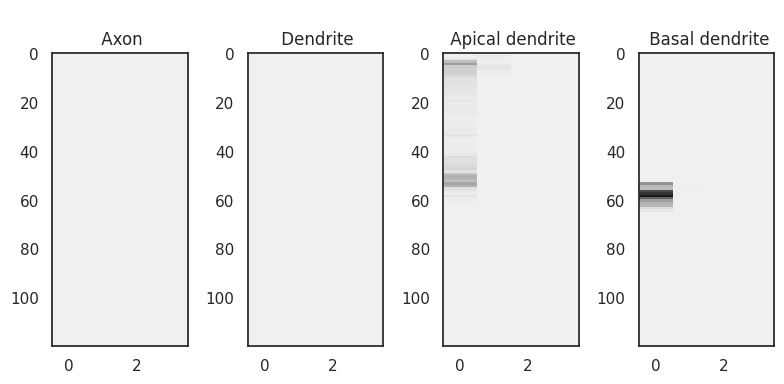

=============================  reconstructed image from reconstructed nmf from zt =============================


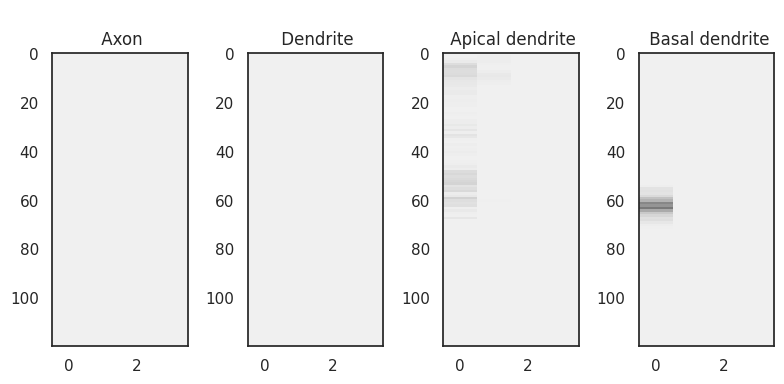

=============================  reconstructed image from reconstructed nmf from ze =============================


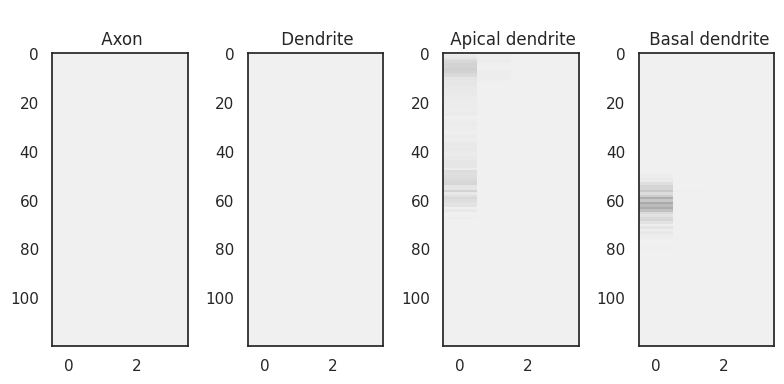

In [72]:
cell= 100
print("========================================  Original Image of a fmost cell ========================================")
plot_m(cpl_10k_output['hist_ax_de_api_bas'][masks['is_m_1d']][cell,...])
print("=============================  reconstructed image from reconstructed nmf from zt =============================")
plot_m(rec_arbor_densities['xrm_from_zt'][masks['is_m_1d']][cell,...])
print("=============================  reconstructed image from reconstructed nmf from ze =============================")
plot_m(rec_arbor_densities['xrm_from_ze'][masks['is_m_1d']][cell,...])

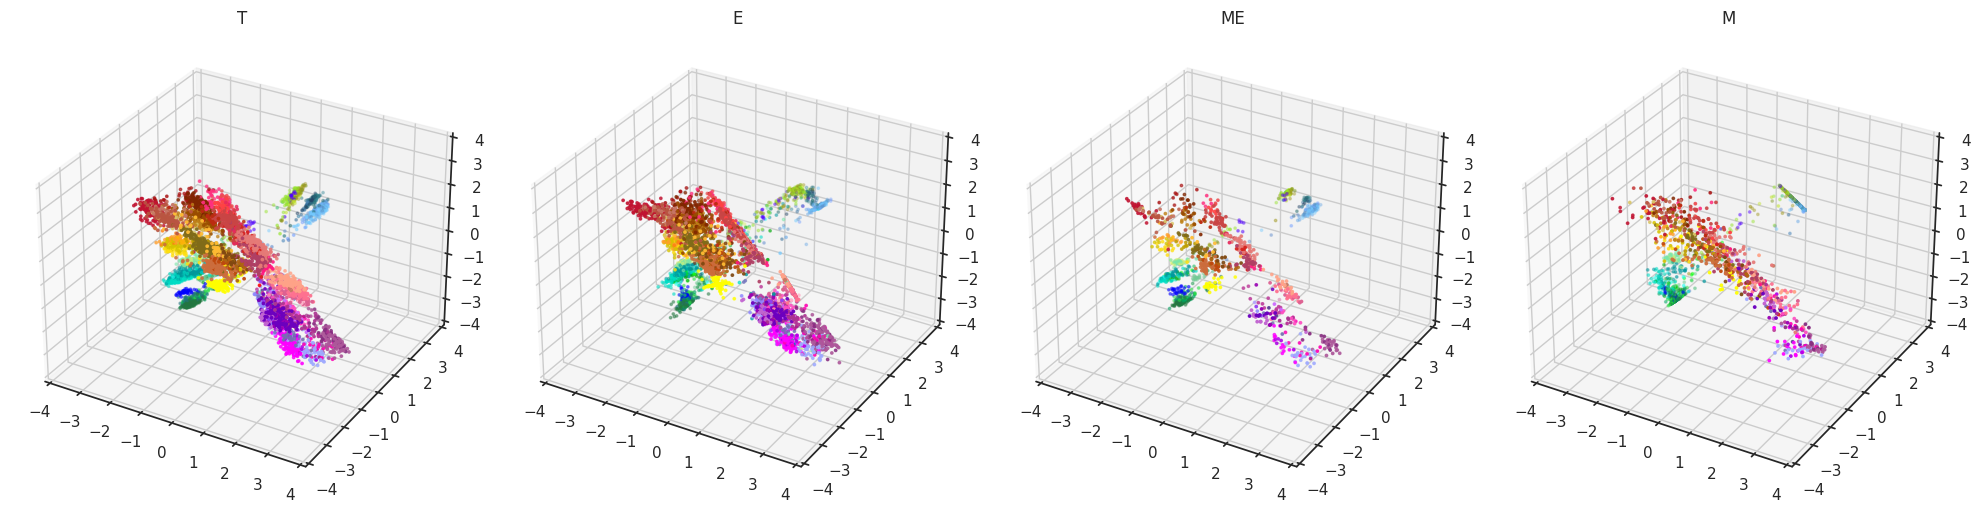

10fold cross_validated Classification acc at different levels:
+----+--------------+---------------+----------------+-----------------+----------------+
|    |   t_clusters |   t_class_acc |   et_class_acc |   met_class_acc |   mt_class_acc |
|----+--------------+---------------+----------------+-----------------+----------------|
|  0 |           93 |         57.07 |          48.43 |           48.68 |          30.08 |
|  0 |           59 |         73.78 |          66.61 |           73.2  |          50.03 |
|  0 |           50 |         77.47 |          70.06 |           78.88 |          55.32 |
+----+--------------+---------------+----------------+-----------------+----------------+
######################################## EM cells are shown in gray #################################################


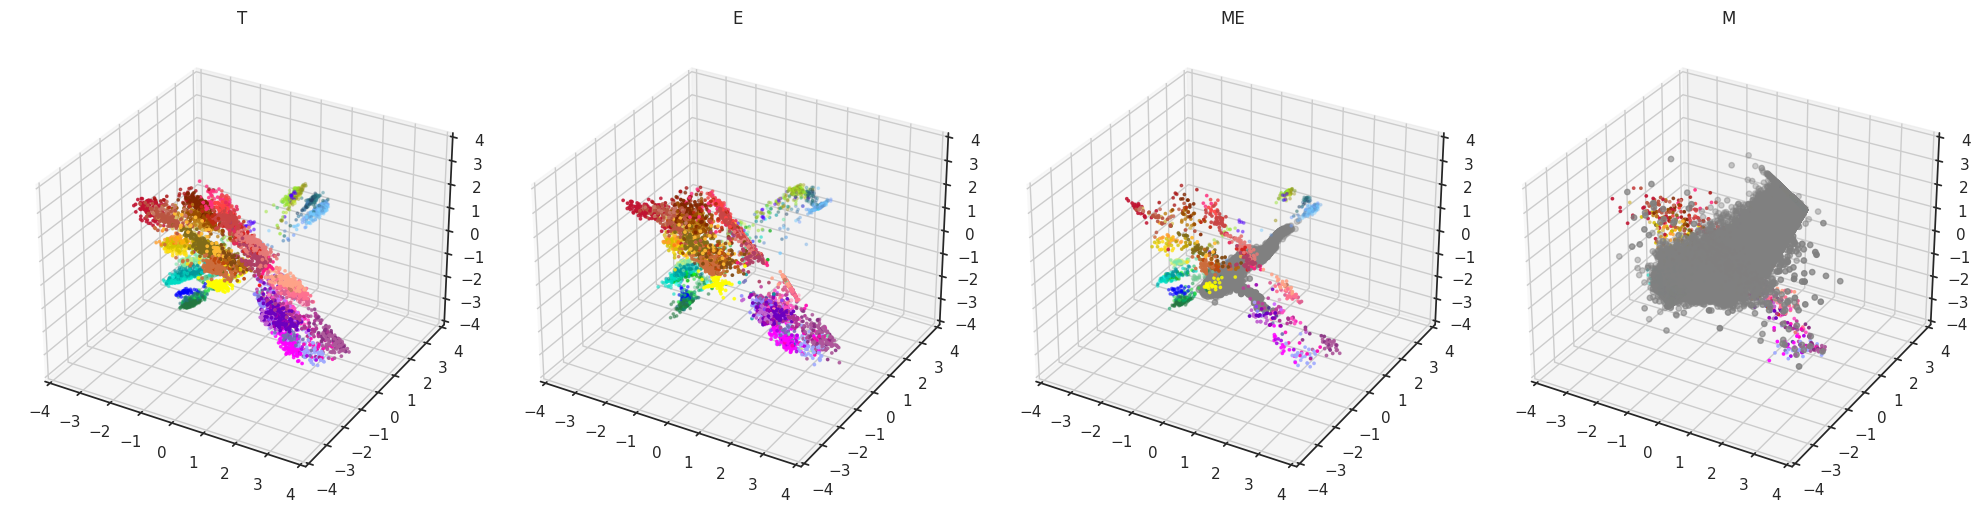

######################################## fmost cells are shown in gray #################################################


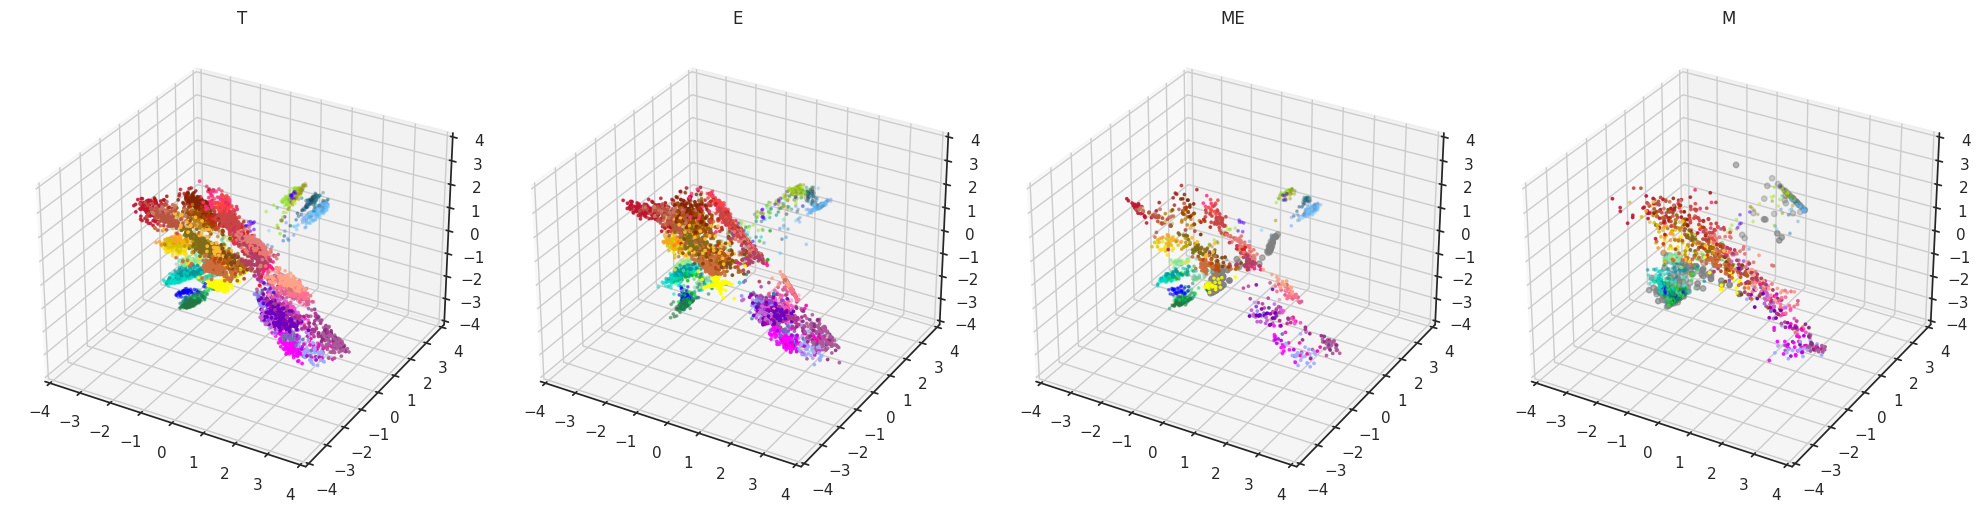

In [3]:
lim = (-4,4)
cpl_50k_output = load_exp_output(exp_name="MET_50k_stratified_400nmfs_50met_narrower_shorter_M_w_noise", pkl_file="Results_trial_747.pkl")
fmost_mask = [True if i.rstrip()=="fMOST" else False for i in cpl_50k_output['platform']]
EM_mask = [True if i.rstrip()=="EM" else False for i in cpl_50k_output['platform']]
em_cells = cpl_50k_output['specimen_id'][EM_mask]
fmost_cells = cpl_50k_output['specimen_id'][fmost_mask]


plot_z_3d(cpl_50k_output, xlim=lim, ylim=lim, zlim=lim)
print("10fold cross_validated Classification acc at different levels:")
print(tabulate(summary_classification_results(cpl_50k_output), headers = 'keys', tablefmt = 'psql'))
print("######################################## EM cells are shown in gray #################################################")
plot_z_3d(cpl_50k_output, cell_mask=EM_mask, xlim=lim, ylim=lim, zlim=lim)
print("######################################## fmost cells are shown in gray #################################################")
plot_z_3d(cpl_50k_output, cell_mask=fmost_mask, xlim=lim, ylim=lim, zlim=lim)

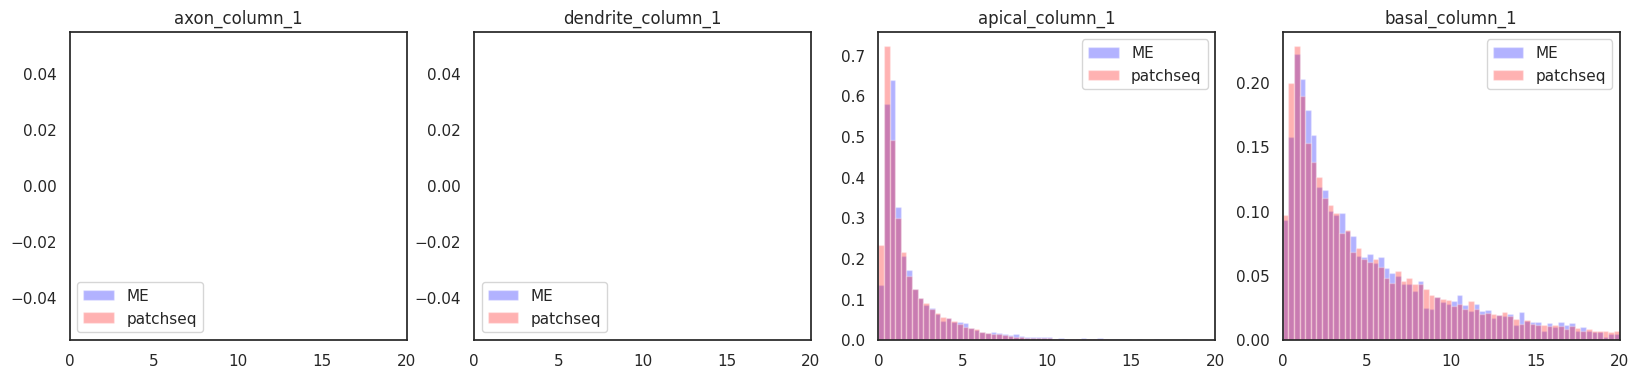

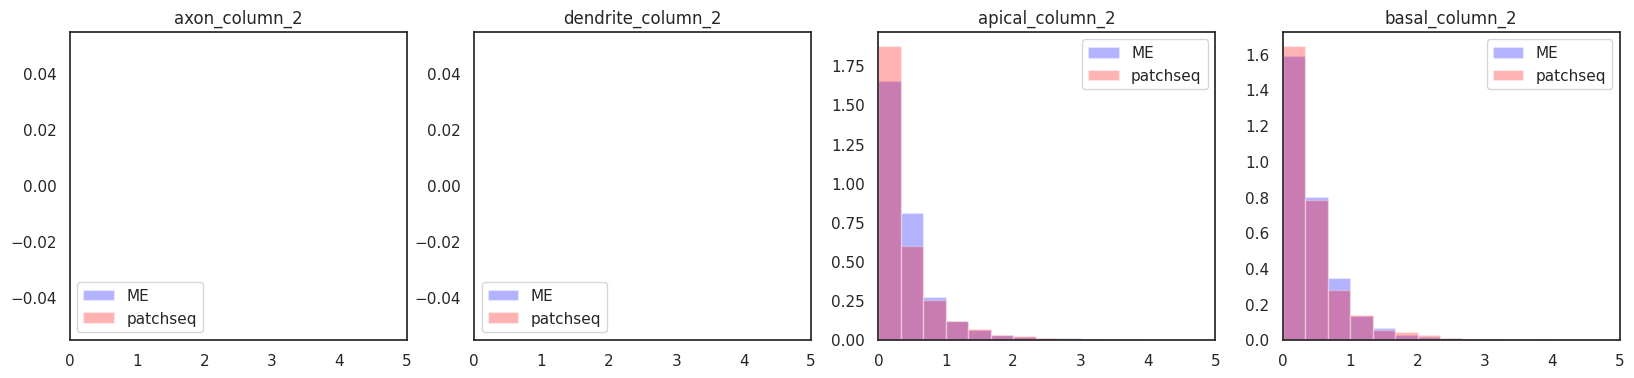

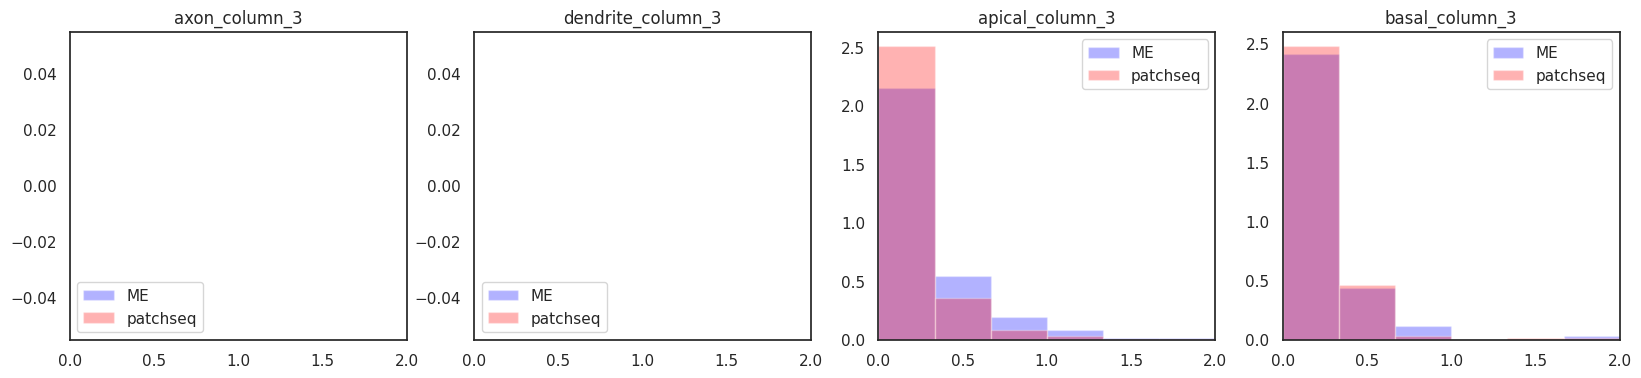

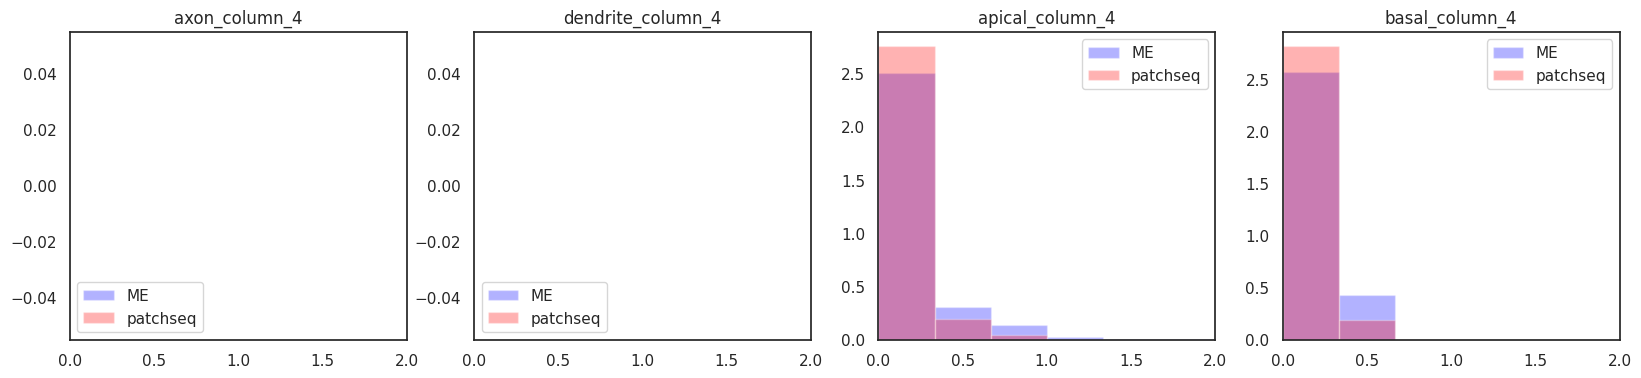

In [101]:
color = ["blue", "red", "green", "yellow", "orange"]
for j in range(4):
    f, ax = plt.subplots(1,4, figsize=(20,4))
    for i, t in enumerate(["axon", "dendrite", "apical", "basal"]):
        c = 0
        for platform, title in zip([ME_m_exc_1d, patchseq_m_exc_1d],
                           ["ME", "patchseq"]):
            arbor_channel = output['hist_ax_de_api_bas'][platform][:,:,:,i]         
            col = arbor_channel[:,:,j].flatten()
            col = col[col!=0.]
            counts, bins = np.histogram(col, bins=[i/3 for i in range((j+1) * 200)], density=True)
            ax[i].hist(bins[:-1], bins, weights=counts, label=title, alpha=0.3, color=color[c])       
            # ax[i].hist(col, alpha=0.5, label="column_"+str(j+1), bins=8)
            ax[i].set(title=t+"_column_"+str(j+1))
            if j == 0:
                ax[i].set_xlim((0,20))
            if j == 1:
                ax[i].set_xlim((0,5))
            if j == 2:
                ax[i].set_xlim((0,2))
            if j == 3:
                ax[i].set_xlim((0,2))
            # ax[i].set_ylim((0,1))
            ax[i].legend()
            c +=1
plt.show()